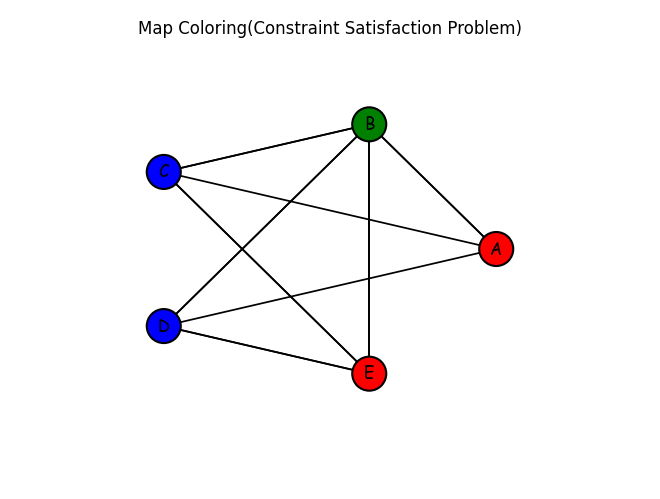

Node: A  Color: red
Node: B  Color: green
Node: C  Color: blue
Node: D  Color: blue
Node: E  Color: red


<Figure size 640x480 with 0 Axes>

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
def backtrack(graph, colors):
    assign = {node : -1 for node in graph}
    return rec_backtrack(assign, graph, colors)
def rec_backtrack(assign, graph, colors):
    if -1 not in assign.values():
        return assign
    node = [x for x in assign if assign[x] == -1][0]
    for color in colors:
        if all(assign[adj] != color for adj in graph[node]):
            assign[node] = color
            result = rec_backtrack(assign, graph, colors)
            if result:
                return result
            assign[node] = -1
    return None
def display_map(graph, colors = None):
    g = nx.DiGraph(graph)
    #nx.draw_circular(g, with_labels = True, node_color = colors)
    nx.draw_circular(g, with_labels = True,
                    node_size = 600, node_color = colors,
                    font_size = 12, font_family = 'cursive',
                    arrows = False, width = 1.25,
                    edgecolors = 'black', linewidths = 1.5,
                    margins = 0.375, clip_on = False)
    plt.suptitle("Map Coloring(Constraint Satisfaction Problem)")
    plt.show()
    plt.clf()
def get_graph():
    graph = {}
    print("Enter edge (u, v)")
    print("[PRESS ENTER TO STOP]")
    x = input()
    while x:
        x = x.split(maxsplit = 1)
        u, adj = x[0], {v.strip() for v in x[1].strip(' []').split(',') if v}
        graph[u] = graph.get(u,set()) | adj
        for v in adj:
            graph[v] = graph.get(v,set()) | {u}
        x = input()
    return graph
def example():
    graph = {
        'A' : ['B', 'C'],
        'B' : ['A', 'C', 'D', 'E'],
        'C' : ['B', 'E'],
        'D' : ['A', 'B', 'E'],
        'E' : ['B', 'C', 'D']}
    colors = ["red","green","blue"]
    sol = backtrack(graph, colors)
    
    if sol:
        display_map(graph, sol.values())
        for (node, color) in sol.items():
            print("Node:",node," Color:",color)
    else:
        print("No Solution Exists")
    

def main():
    example();return #modify example accordingly
    graph = get_graph()
    #available default colors ["red","green","blue","yellow","orange","violet","pink","brown","black",etc]
    colors = ["red","green","blue"]
    sol = backtrack(graph, colors)
    
    if sol:
        display_map(graph, sol.values())
        for (node, color) in sol.items():
            print("Node:",node," Color:",color)
    else:
        print("No Solution Exists")
    
    #Sample output
    #Enter edge (u, v)
    #[PRESS ENTER TO STOP]
    #A B
    #A C
    #B C
    #B D
    #B E
    #C E
    #D E

    #Node:  A  Color: red
    #Node:  B  Color: green
    #Node:  C  Color: blue
    #Node:  D  Color: blue
    #Node:  E  Color: red
main()